In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.235647,NaN,NaN
1,-0.704569,NaN,NaN
2,-0.604641,NaN,0.562312
3,-0.601730,NaN,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


In [16]:
df.fillna(0)

,0,1,2
0,0.235647,0.000000,0.000000
1,-0.704569,0.000000,0.000000
2,-0.604641,0.000000,0.562312
3,-0.601730,0.000000,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.235647,0.500000,0.000000
1,-0.704569,0.500000,0.000000
2,-0.604641,0.500000,0.562312
3,-0.601730,0.500000,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


In [18]:
df.fillna(method="bfill")    # интерполяция

,0,1,2
0,0.235647,-0.209068,0.562312
1,-0.704569,-0.209068,0.562312
2,-0.604641,-0.209068,0.562312
3,-0.601730,-0.209068,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,0.235647,NaN,0.562312
1,-0.704569,NaN,0.562312
2,-0.604641,-0.209068,0.562312
3,-0.601730,-0.209068,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


In [20]:
df.fillna(data.mean())

,0,1,2
0,0.235647,6.500000,3.000000
1,-0.704569,6.500000,3.000000
2,-0.604641,6.500000,0.562312
3,-0.601730,6.500000,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


In [21]:
df.fillna(data.median())

,0,1,2
0,0.235647,6.500000,3.000000
1,-0.704569,6.500000,3.000000
2,-0.604641,6.500000,0.562312
3,-0.601730,6.500000,0.605646
4,0.102112,-0.209068,0.815930
5,-0.357823,0.369459,-0.557690
6,-0.789201,0.426449,0.052116


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

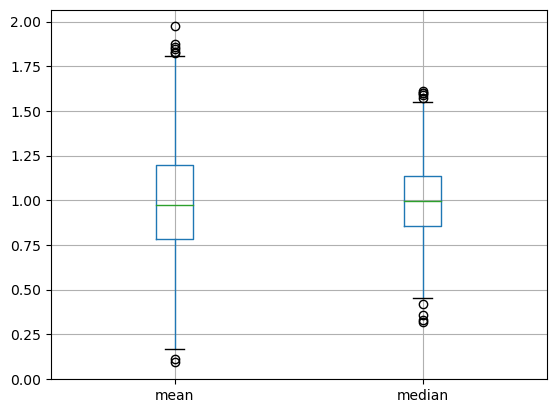

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,0.235647,NaN,NaN,1
1,-0.704569,NaN,NaN,1
2,-0.604641,NaN,0.562312,0
3,-0.601730,NaN,0.605646,0
4,0.102112,-0.209068,0.815930,0
5,-0.357823,0.369459,-0.557690,0
6,-0.789201,0.426449,0.052116,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

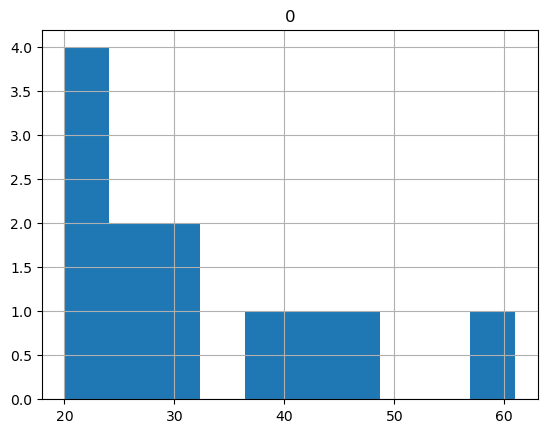

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

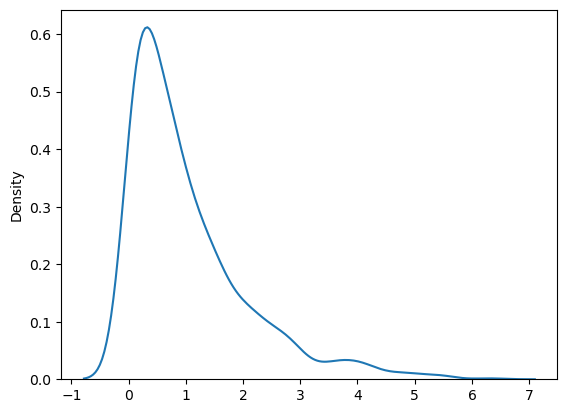

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

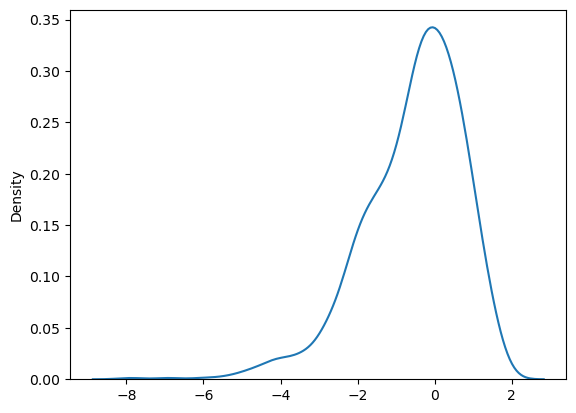

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

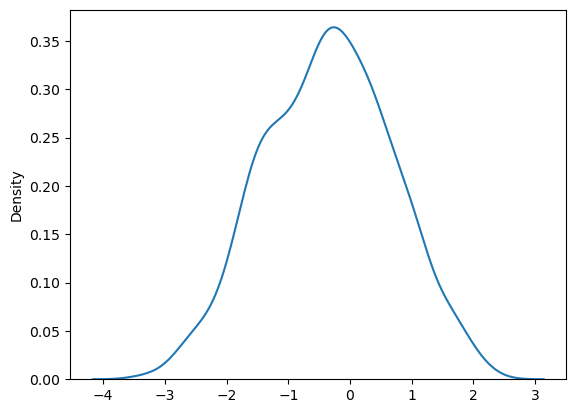

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.2563578399060296

# Домашнее задание

In [47]:
#df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df = pd.read_csv('techparams_train.csv', sep=',')

In [48]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [50]:
X = df.drop(["target"], axis=1)    # независимые переменные
y = df[["target"]]    # зависимая переменная
# деление на тестовую и тренировочную группы:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# построение модели:
reg = LinearRegression().fit(train_X, train_y)

In [52]:
reg.score(train_X, train_y)    # коэффициент детерминации R^2

0.45554067850400504

In [53]:
mean_squared_error(reg.predict(train_X), train_y)    # дисперсия

29840.121250865286

In [90]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [55]:
scores

{'fit_time': array([0.08413744, 0.03937817, 0.04060292]),
 'score_time': array([0.0080235 , 0.01010799, 0.0101018 ]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [56]:
mean_squared_error(reg.predict(test_X), test_y)

31021.02439985442

### Решение

#### Знакомство с данными

In [57]:
# еще раз посмотрим, как выглядит наш датафрейм:
df.head(3)

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648


In [58]:
# посмотрим,какие типы данных присутствут в таблице:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

Все данные числовые, однако некоторые из них могут являться категориальными, а их можно включать в модель через фиктивные переменные. Пустых ячеек нет.

In [59]:
# проверим на наличие дубликатов:
df.duplicated().sum()

0

Дубликатов также не найдено.

Также мне не совсем нравится формат заголовков столбцов, поменяем '-' на '_'

In [60]:
col = ['_'.join(c.split('-')) for c in list(df.columns)]
df.columns = col

Далее попытаемся разобраться, что значит каждый столбец

In [61]:
df['index'].unique()    # какой-то индекс - категориальная 
#(но, я не знаю, что она означает, поэтому в модель включать не буду)

array([    0,     2,     4, ..., 61226, 61227, 61228], dtype=int64)

In [62]:
df['back_suspension'].unique()    # задняя подвеска - похоже на категоральную переменную

array([ 9,  3,  0,  8, 10,  6,  7,  1,  4,  5,  2], dtype=int64)

Далее буду писать код в виде комментариев, так как вывод занимает много места (бесполезно)

In [63]:
# df['battery_capacity'].unique()    # емкость батареи - количественная

Замечена емкость отрицательная емкость батареи. Заменим на среднее положительных.

In [64]:
awg_c = df[df['battery_capacity'] > 0]['battery_capacity'].mean()
df.loc[df['battery_capacity'] < 0, 'battery_capacity'] = awg_c

In [65]:
# df['charge_time'].unique()    # время заряда - количесвтенная

In [66]:
# df['compression'].unique()    # сжатие - количественная

Отрицательное значение кажется мне неправильным.

In [67]:
df.loc[df['compression'] < 0, 'compression'] = -1 * df.loc[df['compression'] < 0, 'compression'].copy()

In [68]:
# df['consumption_mixed'].unique()    # потребление - количественная
df.loc[df['consumption_mixed'] < 0, 'consumption_mixed'] = -1 * df.loc[df['consumption_mixed'] < 0, 'consumption_mixed'].copy()

In [69]:
# df['cylinders_value'].unique()    # число цилиндров - количественная

In [70]:
# df['cylinders_order'].unique()    # тоже число цилиндров??

Может ли быть число цилиндров равно 0?

In [71]:
# df['engine_feeding'].unique()    # питание двигателя, не понимаю, объем или что?

In [72]:
# df['engine_start'].unique()    # год начала работы двигателя - категориальная

In [73]:
# df['engine_stop'].unique()    # год, когда двигатель износился, я думаю
# категориальная переменная

Нулевой год? Я даже не знаю, на что его заменить. Может посмотреть средний срок износа и прибавить к году начала работы

In [74]:
# сначала проверим, есть ли строки в которых двигатель перестал работать раньше, чем начал
df[df['engine_stop'] < df['engine_start']].shape[0]

4242

In [75]:
# такие строки есть, а не наши ли это строки с нулевым годом:
df[df['engine_stop'] < df['engine_start']].index == df[df['engine_stop'] == 0].index

ValueError: Lengths must match to compare

In [95]:
# не совпали по длине, значит, есть еще строки с ошибками, кроме нулевого года
am = df['engine_stop'] - df['engine_start']
avg_am = am.where(am >= 0).mean()
df.loc[df['engine_stop'] == 0, 'engine_stop'] = df.loc[df['engine_stop'] == 0, 'engine_start'] + np.ceil(avg_am)

In [96]:
# теперь разберемся с теми, что вышли из строя, не начав работать (их осталось уже только 16):
# поменяем столбцы местами
start = dict(df['engine_start'].copy()) | dict(df.loc[df['engine_stop'] < df['engine_start'], 'engine_stop'].copy())
stop = dict(df['engine_stop'].copy()) | dict(df.loc[df['engine_stop'] < df['engine_start'], 'engine_start'].copy())
df['engine_start'] = df.index.map(start)
df['engine_stop'] = df.index.map(stop)

In [97]:
# для дальнейшего анализа можно создать переменную, обозначающую число лет работы:
df['durability'] = df['engine_stop'] - df['engine_start']

In [98]:
# df['engine_type'].unique()    # тип двигателя - категориальная

In [99]:
# df['gear_type'].unique()    # тип механизма - категориальная

In [100]:
# df['luxury'].unique()    # роскошь?? будем считать, что это цена - количественная переменная

In [101]:
# df['max_speed'].unique()    # максимальная скорость - количественная

In [102]:
# опять отрицательные числа, заменим на среднее положительных значений:
awg_s = df[df['max_speed'] > 0]['max_speed'].mean()
df.loc[df['max_speed'] < 0, 'max_speed'] = awg_s

In [103]:
# df['power_electro_kw'].unique()    # мощность - количественная
awg_p = df[df['power_electro_kw'] > 0]['power_electro_kw'].mean()
df.loc[df['power_electro_kw'] < 0, 'power_electro_kw'] = awg_p

In [104]:
# df['supply_system'].unique()    # система снабжения - категориальная

In [105]:
# df['valves'].unique()    # клапаны (число видимо) - количественная
# df['valves'].min() = 0

In [106]:
# df['valvetrain'].unique()    # клапанный механизм - категориальная

In [107]:
#df['weight'].unique()    # вес - количественная
df['weight'].min()    # отрицательный вес, заменим на средний положительный вес или удалим?
df[df['weight'] < 0]    # не удалим, так как слишком много значений потеряем
awg_w = df[df['weight'] > 0]['weight'].mean()
df.loc[df['weight'] < 0, 'weight'] = awg_w

In [108]:
# df['configurations_auto_premiere'].unique()    # какие-то показатели - количественная

In [109]:
# df['configurations_back_wheel_base'].unique()    # количественная
awg_bw = df[df['configurations_back_wheel_base'] > 0]['configurations_back_wheel_base'].mean()
df.loc[df['configurations_back_wheel_base'] < 0, 'configurations_back_wheel_base'] = awg_bw

In [110]:
# df['configurations_front_brake'].unique()    # что-то про передний тормоз - похоже на категориальную

In [111]:
# df['configurations_safety_rating'].unique()    # рейтинг безопасности - категориальная

In [112]:
# df['configurations_seats'].unique()    # число мест? - количественная
# 0 мест - просто чудесно

In [113]:
# df['configurations_tank_volume'].unique()    # объем бака - количественная
awg_v = df[df['configurations_tank_volume'] > 0]['configurations_tank_volume'].mean()
df.loc[df['configurations_tank_volume'] < 0, 'configurations_tank_volume'] = awg_v

In [114]:
# df['supergen_year_stop'].unique()    # ??? - количествтенная
awg_ys = df[df['supergen_year_stop'] > 0]['supergen_year_stop'].mean()
df.loc[df['supergen_year_stop'] < 0, 'supergen_year_stop'] = awg_ys

In [115]:
# df['models_country_from'].unique()    # страна происхождения - категориальная

In [116]:
# df['models_group'].unique()    # группа модели - категориальная

In [117]:
# df['models_light_and_commercial'].unique()    # является ли легковой (???) - категориальная
# уже фиктивная, поэтому преобразовывать не надо

In [118]:
#df['models_male'].unique()    # мужская ли модель - ???


#### Работа с выбросами

Количественные переменные, включаемые в модель: ['battery_capacity', 'charge_time', 'compression', 'consumption_mixed', 'cylinders_value', 'durability', 'luxury', 'max_speed', 'power_electro_kw', 'valves', 'weight', 'configurations_auto_premiere', 'configurations_back_wheel_base', 'configurations_seats', 'configurations_tank_volume', 'supergen_year_stop', 'durability'] 

In [119]:
x_c = ['battery_capacity', 'charge_time', 'compression', 'consumption_mixed', 'cylinders_value', 'durability', 'luxury', 'max_speed', 'power_electro_kw', 'valves', 'weight', 'configurations_auto_premiere', 'configurations_back_wheel_base', 'configurations_seats', 'configurations_tank_volume', 'supergen_year_stop', 'durability']

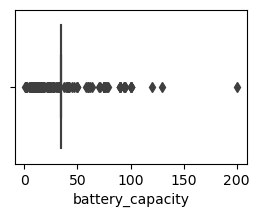

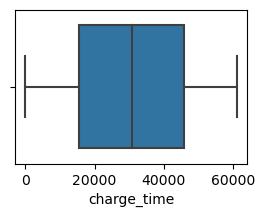

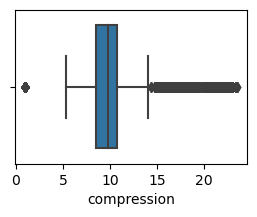

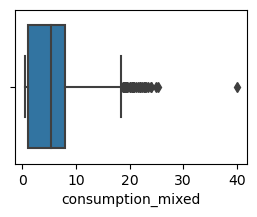

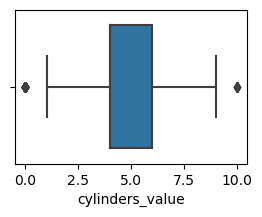

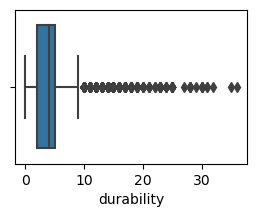

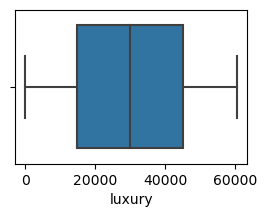

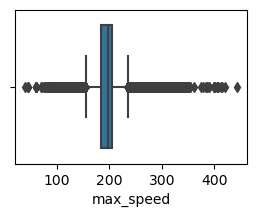

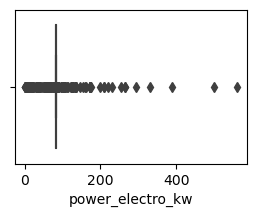

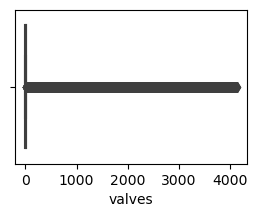

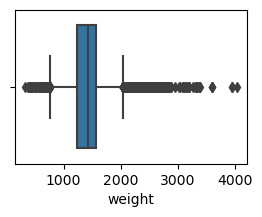

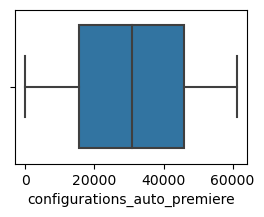

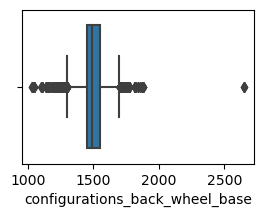

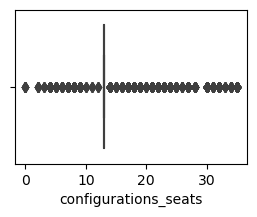

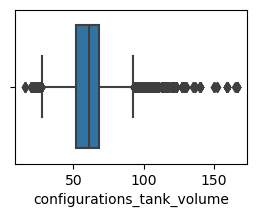

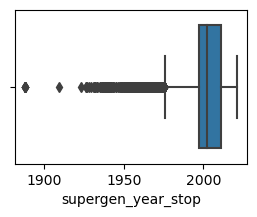

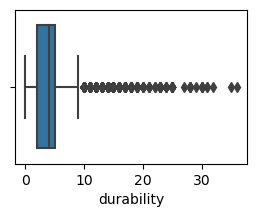

In [120]:
for c in x_c:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data=df, x=c)
    plt.show()

In [121]:
for c in x_c:
    q3 = df[c].describe()['75%']    # 75-ая квантиль
    q1 = df[c].describe()['25%']    # 25-ая квантиль
    iqr = q3-q1    # длина промежутка
    iqr_min = q1 - 1.5 * iqr    # нижняя граница
    iqr_max = q3 + 1.5 * iqr    # верхняя граница
    df = df[(iqr_min <= df[c]) & (df[c] <= iqr_max)]    # перезаписываем датасет без выбросов

In [122]:
df.shape

(15124, 33)

Удалилось две трети датасета...

#### Построение модели

Категориальные по-хорошему надо привести к виду фиктивных, но я думаю, что тогда создастся путаница во всех этих нулях и единицах, также значительно увеличится число переменных, поэтому будем строить модели только по количественным переменным, список которых представлен выше.

In [123]:
from sklearn.metrics import r2_score

Линейная модель

In [168]:
lin_model = LinearRegression()

In [176]:
df_lin = df.copy()
x = df_lin[x_c]    # независимые переменные
y = df_lin[["target"]]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.6273547914374091


Гипербола

In [170]:
df_hip = df.copy()
for c in x_c:
    df_hip = df_hip[df_hip[c] != 0]
    df_hip[c] = 1 / df_hip[c]

In [177]:
hip_model = LinearRegression()
x = df_hip[x_c]    # независимые переменные
y = df_hip[["target"]]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
hip_model.fit(x_train, y_train)
y_pred = hip_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.6471261461246691


Парабола

In [206]:
df_par = df.copy()
x = pd.DataFrame()
for c in x_c:
    df_par[f'{c}^2'] = df_par[c] ** 2
    x[c] = df_par[c]
    x[f'{c}^2'] = df_par[f'{c}^2']

In [207]:
x

,battery_capacity,battery_capacity^2,charge_time,charge_time^2,compression,compression^2,consumption_mixed,consumption_mixed^2,cylinders_value,cylinders_value^2,...,configurations_auto_premiere,configurations_auto_premiere^2,configurations_back_wheel_base,configurations_back_wheel_base^2,configurations_seats,configurations_seats^2,configurations_tank_volume,configurations_tank_volume^2,supergen_year_stop,supergen_year_stop^2
3,34.530197,1192.33453,41405,1714374025,10.3,106.09,1.0,1.00,4,16,...,41425,1716030625,1495.0,2235025.0,13,169,55.000000,3025.000000,2003.0,4012009.0
5,34.530197,1192.33453,22100,488410000,9.6,92.16,6.0,36.00,4,16,...,22097,488277409,1437.0,2064969.0,13,169,45.000000,2025.000000,2017.0,4068289.0
10,34.530197,1192.33453,26825,719580625,8.5,72.25,1.0,1.00,6,36,...,26792,717811264,1385.0,1918225.0,13,169,61.062109,3728.581097,1988.0,3952144.0
15,34.530197,1192.33453,30392,923673664,9.8,96.04,9.8,96.04,4,16,...,30377,922762129,1445.0,2088025.0,13,169,60.000000,3600.000000,1996.0,3984016.0
17,34.530197,1192.33453,52178,2722543684,9.0,81.00,1.0,1.00,4,16,...,52519,2758245361,1465.0,2146225.0,13,169,60.000000,3600.000000,1997.0,3988009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43214,34.530197,1192.33453,5133,26347689,9.5,90.25,7.8,60.84,4,16,...,5107,26081449,1422.0,2022084.0,13,169,49.000000,2401.000000,2001.0,4004001.0
43229,34.530197,1192.33453,43741,1913275081,9.0,81.00,8.6,73.96,4,16,...,43848,1922647104,1442.0,2079364.0,13,169,63.000000,3969.000000,1996.0,3984016.0
43234,34.530197,1192.33453,12898,166358404,10.5,110.25,6.1,37.21,4,16,...,12903,166487409,1488.0,2214144.0,13,169,52.000000,2704.000000,2014.0,4056196.0
43239,34.530197,1192.33453,2583,6671889,9.2,84.64,1.0,1.00,4,16,...,2586,6687396,1429.0,2042041.0,13,169,52.000000,2704.000000,2002.0,4008004.0


Полулогарифмическая модель

In [197]:
df_log = df.copy()
for c in x_c:
    df_log = df_log[df_log[c] > 0]
    df_log[c] = np.log(df_log[c])

In [198]:
log_model = LinearRegression()
x = df_log[x_c]    # независимые переменные
y = df_log[["target"]]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.6173699259881253


Показательная

In [199]:
df_pok = df.copy()
df_pok = df_pok[df_pok['target'] > 0]

In [200]:
pok_model = LinearRegression()
x = df_pok[x_c]    # независимые переменные
y = np.log(df_pok[["target"]])    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
pok_model.fit(x_train, y_train)
y_pred = pok_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.6285625296046761


Степенная

In [202]:
df_st = df.copy()
for c in x_c:
    df_st = df_st[df_st[c] > 0]
    df_st[c] = np.log(df_st[c])
df_st = df_st[df_st['target'] > 0]
df_st['target'] = np.log(df_st['target'])

In [203]:
st_model = LinearRegression()
x = df_st[x_c]    # независимые переменные
y = df_st[["target"]]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
st_model.fit(x_train, y_train)
y_pred = st_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.5896717453315119


Наибольший коэффициент детерминации получился в параболической модели.